<a href="https://colab.research.google.com/github/dahlia52/Commercial-District-Analysis/blob/main/code/%EC%83%81%EA%B6%8C%EB%B3%80%ED%99%94%EC%A7%80%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#matplotlib 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,483 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import seaborn as sns
import numpy as np

## 데이터 결합

In [ ]:
standard = pd.read_csv('/content/drive/MyDrive/광진구팟/Data/상권분석/광진구 상권.csv')
standard.head(3)

,시군구명,행정동명,상권_구분_코드_명,상권_코드_명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,상권_코드,상권_구분_코드,법정동명
0,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동
1,광진구,중곡제1동,골목상권,중곡1동 마을마당,127.074513,37.564290,206769,451337,11215740,2110150,A,중곡동
2,광진구,구의제1동,골목상권,광진경찰서,127.081126,37.546446,207355,449357,11215850,2110160,A,구의동


In [ ]:
standard.상권_구분_코드_명.unique()

array(['골목상권', '발달상권', '전통시장'], dtype=object)

In [ ]:
standard[standard.상권_구분_코드_명 == '골목상권'] # 41개

,시군구명,행정동명,상권_구분_코드_명,상권_코드_명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,상권_코드,상권_구분_코드,법정동명
0,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동
1,광진구,중곡제1동,골목상권,중곡1동 마을마당,127.074513,37.564290,206769,451337,11215740,2110150,A,중곡동
2,광진구,구의제1동,골목상권,광진경찰서,127.081126,37.546446,207355,449357,11215850,2110160,A,구의동
3,광진구,자양제3동,골목상권,신자초등학교,127.070534,37.534406,206420,448020,11215840,2110146,A,자양동
4,광진구,자양제2동,골목상권,자양한강도서관,127.075161,37.533746,206829,447947,11215830,2110151,A,자양동
5,광진구,자양제2동,골목상권,성동초등학교,127.086409,37.535207,207823,448110,11215830,2110169,A,자양동
6,광진구,자양제1동,골목상권,광진정말공원,127.076985,37.536042,206990,448202,11215820,2110154,A,자양동
7,광진구,자양제3동,골목상권,뚝섬유원지역 1번,127.066622,37.536292,206074,448229,11215840,2110143,A,자양동
8,광진구,화양동,골목상권,어린이대공원역 4번,127.069643,37.549129,206340,449654,11215710,2110144,A,화양동
9,광진구,자양제1동,골목상권,광진구청,127.077195,37.541772,207008,448838,11215820,2110155,A,자양동


In [ ]:
standard[standard.상권_구분_코드_명 == '발달상권'] # 9개

,시군구명,행정동명,상권_구분_코드_명,상권_코드_명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,상권_코드,상권_구분_코드,법정동명
42,광진구,구의제3동,발달상권,올림픽대교북단,127.093719,37.544562,208468,449149,11215870,2120061,D,구의동
43,광진구,구의제1동,발달상권,구의역,127.083416,37.539993,207558,448641,11215850,2120056,D,구의동
44,광진구,능동,발달상권,아차산역,127.086545,37.554533,207833,450255,11215780,2120057,D,능동
45,광진구,구의제1동,발달상권,구의사거리,127.086548,37.547721,207834,449499,11215850,2120058,D,구의동
46,광진구,군자동,발달상권,군자역,127.077350,37.560279,207020,450892,11215730,2120055,D,군자동
47,광진구,화양동,발달상권,어린이대공원역,127.071399,37.550453,206495,449801,11215710,2120054,D,화양동
48,광진구,화양동,발달상권,건대입구역(건대),127.067364,37.543896,206139,449073,11215710,2120053,D,화양동
49,광진구,구의제3동,발달상권,구삼강변맛길,127.090094,37.541691,208148,448830,11215870,2120059,D,구의동
50,광진구,구의제3동,발달상권,강변역(테크노마트),127.092770,37.537481,208385,448363,11215870,2120060,D,구의동


In [ ]:
standard[standard.상권_구분_코드_명 == '전통시장'] # 11개

,시군구명,행정동명,상권_구분_코드_명,상권_코드_명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,상권_코드,상권_구분_코드,법정동명
51,광진구,중곡제3동,전통시장,면곡골목시장,127.079130,37.573846,207176,452398,11215760,2130082,R,중곡동
52,광진구,자양제4동,전통시장,조양시장,127.065382,37.541662,205964,448825,11215847,2130077,R,자양동
53,광진구,화양동,전통시장,한아름시장,127.067796,37.546355,206177,449346,11215710,2130079,R,화양동
54,광진구,자양제3동,전통시장,능동로골목시장,127.064462,37.537798,205883,448396,11215840,2130076,R,자양동
55,광진구,자양제2동,전통시장,자양종합시장(기능상실),127.074302,37.534620,206753,448044,11215830,2130080,R,자양동
56,광진구,자양제4동,전통시장,노룬산시장(노룬산골목시장),127.062732,37.539321,205730,448565,11215847,2130075,R,자양동
57,광진구,중곡제4동,전통시장,신성시장(신성골목시장),127.086518,37.560786,207830,450949,11215770,2130084,R,중곡동
58,광진구,중곡제1동,전통시장,"중곡제일시장(중곡제일골목시장, 광성시장)",127.079122,37.566566,207176,451590,11215740,2130083,R,중곡동
59,광진구,화양동,전통시장,화양제일골목시장,127.066981,37.545986,206105,449305,11215710,2130078,R,화양동
60,광진구,자양제4동,전통시장,영동교골목시장,127.061772,37.540917,205645,448742,11215847,2130074,R,자양동


In [ ]:
standard.shape

(62, 12)

In [ ]:
commerce_change = pd.read_csv('/content/drive/MyDrive/광진구팟/Data/상권분석/서울시 우리마을가게 상권분석서비스(상권-상권변화지표).csv', encoding = 'cp949')
commerce_change.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,HH,정체,146,65,123,56
1,2022,4,U,관광특구,1001495,잠실 관광특구,LL,다이나믹,118,55,123,56
2,2022,4,U,관광특구,1001494,종로?청계 관광특구,HH,정체,165,75,123,56
3,2022,4,U,관광특구,1001493,동대문패션타운 관광특구,HH,정체,151,65,123,56
4,2022,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,HH,정체,170,66,123,56


In [ ]:
commerce_change.shape

(40020, 12)

- 2017 ~ 2022년 1 ~ 4 분기동안의 데이터가 모두 들어있음.

-> 최근것만 남길지..

-> 변화 양상을 볼지..

In [ ]:
commerce_change[commerce_change.상권_코드_명 == '세종대학교']

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
1519,2022,4,A,골목상권,2110149,세종대학교,HH,정체,137,62,123,56
3187,2022,3,A,골목상권,2110149,세종대학교,HH,정체,134,62,122,56
4855,2022,2,A,골목상권,2110149,세종대학교,HH,정체,134,62,121,55
6523,2022,1,A,골목상권,2110149,세종대학교,HH,정체,137,63,119,55
8191,2021,4,A,골목상권,2110149,세종대학교,HH,정체,137,63,118,55
9859,2021,3,A,골목상권,2110149,세종대학교,HH,정체,137,61,117,55
11527,2021,2,A,골목상권,2110149,세종대학교,HH,정체,134,61,116,55
13195,2021,1,A,골목상권,2110149,세종대학교,HH,정체,131,61,115,54
14863,2020,4,A,골목상권,2110149,세종대학교,HH,정체,131,61,114,54
16531,2020,3,A,골목상권,2110149,세종대학교,HH,정체,126,61,113,54


In [ ]:
index = [0,1] + list(range(5,12))
commerce_광진 = pd.merge(standard, commerce_change.iloc[:,index], on = '상권_코드_명')

In [ ]:
commerce_광진.head()

,시군구명,행정동명,상권_구분_코드_명,상권_코드_명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,상권_코드,상권_구분_코드,법정동명,기준_년_코드,기준_분기_코드,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동,2022,4,HH,정체,137,62,123,56
1,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동,2022,3,HH,정체,134,62,122,56
2,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동,2022,2,HH,정체,134,62,121,55
3,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동,2022,1,HH,정체,137,63,119,55
4,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동,2021,4,HH,정체,137,63,118,55


In [ ]:
commerce_광진.shape # 62개의 상권에 대해 2017~2022년, 1~4분기 데이터 (62*24)

(1488, 20)

In [ ]:
commerce_광진.상권_구분_코드_명.unique()

array(['골목상권', '발달상권', '전통시장'], dtype=object)

## 발달상권 분석

In [ ]:
commerce_발달상권 = commerce_광진[commerce_광진.상권_구분_코드_명 == '발달상권']
commerce_발달상권

,시군구명,행정동명,상권_구분_코드_명,상권_코드_명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,상권_코드,상권_구분_코드,법정동명,기준_년_코드,기준_분기_코드,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
1008,광진구,구의제3동,발달상권,올림픽대교북단,127.093719,37.544562,208468,449149,11215870,2120061,D,구의동,2022,4,LL,다이나믹,116,52,123,56
1009,광진구,구의제3동,발달상권,올림픽대교북단,127.093719,37.544562,208468,449149,11215870,2120061,D,구의동,2022,3,LL,다이나믹,114,51,122,56
1010,광진구,구의제3동,발달상권,올림픽대교북단,127.093719,37.544562,208468,449149,11215870,2120061,D,구의동,2022,2,LL,다이나믹,113,51,121,55
1011,광진구,구의제3동,발달상권,올림픽대교북단,127.093719,37.544562,208468,449149,11215870,2120061,D,구의동,2022,1,LL,다이나믹,113,50,119,55
1012,광진구,구의제3동,발달상권,올림픽대교북단,127.093719,37.544562,208468,449149,11215870,2120061,D,구의동,2021,4,LL,다이나믹,111,50,118,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,광진구,구의제3동,발달상권,강변역(테크노마트),127.092770,37.537481,208385,448363,11215870,2120060,D,구의동,2018,1,HH,정체,118,55,102,52
1220,광진구,구의제3동,발달상권,강변역(테크노마트),127.092770,37.537481,208385,448363,11215870,2120060,D,구의동,2017,4,HH,정체,115,55,100,52
1221,광진구,구의제3동,발달상권,강변역(테크노마트),127.092770,37.537481,208385,448363,11215870,2120060,D,구의동,2017,3,HH,정체,115,55,99,51
1222,광진구,구의제3동,발달상권,강변역(테크노마트),127.092770,37.537481,208385,448363,11215870,2120060,D,구의동,2017,2,HH,정체,114,55,98,51


In [ ]:
commerce_발달상권[['상권_코드_명','상권_변화_지표','기준_년_코드','기준_분기_코드']].sort_values(['상권_코드_명','기준_년_코드','기준_분기_코드']).drop_duplicates(subset = ['상권_코드_명','상권_변화_지표'])

,상권_코드_명,상권_변화_지표,기준_년_코드,기준_분기_코드
1223,강변역(테크노마트),HH,2017,1
1175,건대입구역(건대),LH,2017,1
1174,건대입구역(건대),LL,2017,2
1199,구삼강변맛길,LH,2017,1
1185,구삼강변맛길,LL,2020,3
1103,구의사거리,HH,2017,1
1085,구의사거리,HL,2021,3
1055,구의역,LL,2017,1
1049,구의역,HL,2018,3
1127,군자역,LL,2017,1


In [ ]:
발달상권_변화 = commerce_발달상권[['상권_코드_명','상권_변화_지표']].drop_duplicates().groupby('상권_코드_명').count()
발달상권_변화리스트 = list(발달상권_변화[발달상권_변화.상권_변화_지표 > 1].reset_index().상권_코드_명)
발달상권_변화리스트

['건대입구역(건대)', '구삼강변맛길', '구의사거리', '구의역']

In [ ]:
commerce_발달상권[commerce_발달상권.상권_코드_명 == 발달상권_변화리스트[0]]
plt.title(발달상권_변화리스트[0])
plt.show()

,시군구명,행정동명,상권_구분_코드_명,상권_코드_명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,상권_코드,상권_구분_코드,법정동명,기준_년_코드,기준_분기_코드,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
1152,광진구,화양동,발달상권,건대입구역(건대),127.067364,37.543896,206139,449073,11215710,2120053,D,화양동,2022,4,LL,다이나믹,94,54,123,56
1153,광진구,화양동,발달상권,건대입구역(건대),127.067364,37.543896,206139,449073,11215710,2120053,D,화양동,2022,3,LL,다이나믹,92,54,122,56
1154,광진구,화양동,발달상권,건대입구역(건대),127.067364,37.543896,206139,449073,11215710,2120053,D,화양동,2022,2,LL,다이나믹,92,54,121,55
1155,광진구,화양동,발달상권,건대입구역(건대),127.067364,37.543896,206139,449073,11215710,2120053,D,화양동,2022,1,LL,다이나믹,91,53,119,55
1156,광진구,화양동,발달상권,건대입구역(건대),127.067364,37.543896,206139,449073,11215710,2120053,D,화양동,2021,4,LL,다이나믹,89,53,118,55
1157,광진구,화양동,발달상권,건대입구역(건대),127.067364,37.543896,206139,449073,11215710,2120053,D,화양동,2021,3,LL,다이나믹,89,53,117,55
1158,광진구,화양동,발달상권,건대입구역(건대),127.067364,37.543896,206139,449073,11215710,2120053,D,화양동,2021,2,LL,다이나믹,88,53,116,55
1159,광진구,화양동,발달상권,건대입구역(건대),127.067364,37.543896,206139,449073,11215710,2120053,D,화양동,2021,1,LL,다이나믹,87,53,115,54
1160,광진구,화양동,발달상권,건대입구역(건대),127.067364,37.543896,206139,449073,11215710,2120053,D,화양동,2020,4,LL,다이나믹,85,53,114,54
1161,광진구,화양동,발달상권,건대입구역(건대),127.067364,37.543896,206139,449073,11215710,2120053,D,화양동,2020,3,LL,다이나믹,84,52,113,54


## EDA

- 상권 변화 지표가 변화한 상권이 있는지 확인

In [ ]:
상권_변화 = commerce_광진[['상권_코드_명','상권_변화_지표']].drop_duplicates().groupby('상권_코드_명').count()
상권_변화[상권_변화.상권_변화_지표 > 1]

,상권_변화_지표
상권_코드_명,
건대입구역(건대),2
광진구청,2
광진정말공원,2
광진초등학교,2
구삼강변맛길,2
구의사거리,2
구의역,2
구의역 4번,2
군자역 5번,3


In [ ]:
상권_변화_리스트 = 상권_변화[상권_변화.상권_변화_지표 > 1].index
상권_변화_리스트

Index(['건대입구역(건대)', '광진구청', '광진정말공원', '광진초등학교', '구삼강변맛길', '구의사거리', '구의역',
       '구의역 4번', '군자역 5번', '동대부여고', '면곡골목시장', '성동초등학교', '성자초등학교', '신자초등학교',
       '어린이대공원역 3번', '어린이대공원역 4번', '영동교골목시장', '자양4동주민센터', '자양골목전통시장(자양골목시장)',
       '자양동우체국', '자양종합시장(기능상실)', '자양한강도서관', '조양시장', '중곡3동주민센터', '중곡4동주민센터',
       '중곡어린이공원', '중곡제일시장(중곡제일골목시장, 광성시장)', '푸른동산공원', '한아름시장', '해오름공원',
       '화양사거리'],
      dtype='object', name='상권_코드_명')

In [ ]:
len(상권_변화_리스트)

31

### 상권 변화 지표 명

- 상권변화지표는 상업공간의 변화를 생존 및 폐업 사업체의 평균영업기간을 기반으로 4개로 구분한 지표

- 생존한 사업체의 평균영업기간 (H: high, L: Low)과 폐업한 사업체의 평균영업기간 (H: high, L: Low)을 기준으로 4분할 하여 LL, LH, HL, HH로 구분됨.


In [ ]:
commerce_광진['상권_변화_지표_명'].unique()

array(['정체', '상권축소', '상권확장', '다이나믹'], dtype=object)

In [ ]:
commerce_광진['상권_변화_지표'].unique()

array(['HH', 'HL', 'LH', 'LL'], dtype=object)

In [ ]:
commerce_광진.columns

Index(['시군구명', '행정동명', '상권_구분_코드_명', '상권_코드_명', '경도', '위도', '엑스좌표_값', '와이좌표_값',
       '행정동코드', '상권_코드', '상권_구분_코드', '법정동명', '기준_년_코드', '기준_분기_코드', '상권_변화_지표',
       '상권_변화_지표_명', '운영_영업_개월_평균', '폐업_영업_개월_평균', '서울_운영_영업_개월_평균',
       '서울_폐업_영업_개월_평균'],
      dtype='object')

<Axes: xlabel='상권_변화_지표', ylabel='운영_영업_개월_평균'>

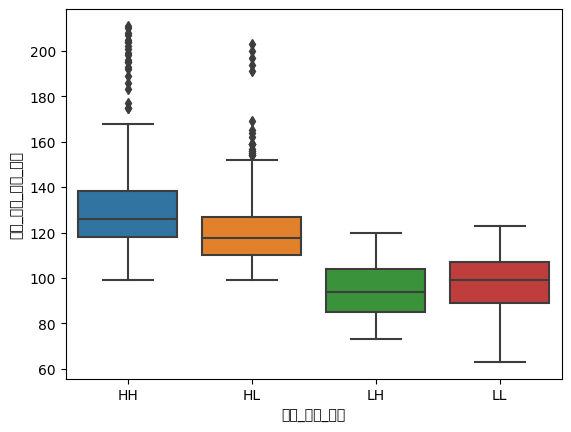

In [ ]:
sns.boxplot(x='상권_변화_지표', y = '운영_영업_개월_평균', data = commerce_광진)

<Axes: xlabel='상권_변화_지표', ylabel='폐업_영업_개월_평균'>

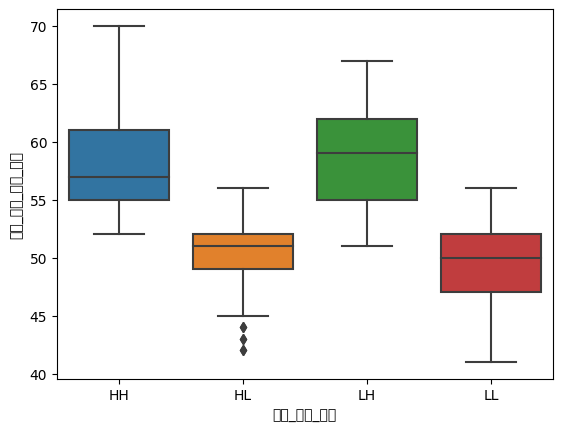

In [ ]:
sns.boxplot(x='상권_변화_지표', y = '폐업_영업_개월_평균', data = commerce_광진)

- 운영_영업_개월_평균은 해당 구역(상권)의 현재 영업 중 점포수들의 영업 개월 평균값

- 서울_운영_개월_평균은 서울시 모든 영업 중 점포수들의 영업 개월 평균값

In [ ]:
commerce_광진[['기준_년_코드', '기준_분기_코드', '서울_운영_영업_개월_평균']].drop_duplicates()

,기준_년_코드,기준_분기_코드,서울_운영_영업_개월_평균
0,2022,4,123
1,2022,3,122
2,2022,2,121
3,2022,1,119
4,2021,4,118
5,2021,3,117
6,2021,2,116
7,2021,1,115
8,2020,4,114
9,2020,3,113


In [ ]:
commerce_광진[['기준_년_코드', '기준_분기_코드', '서울_폐업_영업_개월_평균']].drop_duplicates()

,기준_년_코드,기준_분기_코드,서울_폐업_영업_개월_평균
0,2022,4,56
1,2022,3,56
2,2022,2,55
3,2022,1,55
4,2021,4,55
5,2021,3,55
6,2021,2,55
7,2021,1,54
8,2020,4,54
9,2020,3,54


In [ ]:
commerce_2022 = commerce_광진[(commerce_광진.기준_년_코드 == 2022)&(commerce_광진.기준_분기_코드 == 4)][['상권_코드_명','상권_구분_코드_명','행정동명','상권_변화_지표']]
commerce_2022

,상권_코드_명,상권_구분_코드_명,행정동명,상권_변화_지표
0,세종대학교,골목상권,군자동,HH
24,중곡1동 마을마당,골목상권,중곡제1동,HL
48,광진경찰서,골목상권,구의제1동,HH
72,신자초등학교,골목상권,자양제3동,LH
96,자양한강도서관,골목상권,자양제2동,LL
...,...,...,...,...
1368,신성시장(신성골목시장),전통시장,중곡제4동,HH
1392,"중곡제일시장(중곡제일골목시장, 광성시장)",전통시장,중곡제1동,LL
1416,화양제일골목시장,전통시장,화양동,LL
1440,영동교골목시장,전통시장,자양제4동,HL


In [ ]:
commerce_2022.to_csv('/content/drive/MyDrive/광진구팟/Data/상권분석/2022상권변화지표.csv', index = False)